# CS909/CS429 Data Mining 2023 Assignment 1: Classification
## Nirmal Abeykoon Mudiyanselage
##### Version: 1.1

In this assignment, the objective is to develop a classification solution using classical machine learning methods. Specifically, we shall be solving an object recognition task. Each object is represented by a 28x28 dimensional image in a single 'flattened' 784 dimensional vector with an associated label (+1 or -1). The training data (with labels) and test data (without labels) are available to you at the URL https://github.com/foxtrotmike/CS909/tree/master/2023/A1 

    Xtrain: Training Data (each row is a single image)
    Ytrain: Training labels
    Xtest: Test Data  (each row is a single image)
    You will use Xtrain and Ytrain for training, validation and model selection. The data can be loaded with np.loadtxt


Submission Requirements: You are expected to submit a single Python Notebook containing all answers and code. Include all prediction metrics in a presentable form within your notebook and include the output of the execution of all cells in the notebook as well so that the markers can verify the output. Also submit a consolidated table of your performance metrics within the notebook to indicate which model performs the best (MANDATORY). If you use any libraries other than sklearn, numpy, pandas and scipy, please include the code for its installation  e.g.,  (!pip install xxx).


Your solution will be a single Ipython Notebook (with comments on your code) submitted through Tabula together with a single prediction file for the test data in the format prescribed below. 
Do not use the solutions to previous years’ assignments. Even though the questions in this assignment may appear to be similar to the ones from previous years’ assignments, the expected answers are different as the dataset is significantly different. 



## Question No. 1: (Exploring data) [20% Marks]

Load the training and test data files and answer the following questions:
    
    i.How many training and test examples are there? How many positive and negative examples are there in the training dataset? 
    
    ii.Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the flattened array to 28x28. What are your observations about the nature of the data? Also show 10 randomly selected objects from the test set. Do you see any issues in the data that may limit the generalization performance of your classifier?
    
    iii.Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this problem? Give the reasoning behind your choice(s). 
    
    iv.What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.
    
    v.What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.


In [34]:
# import libraries
import numpy as np
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import set_config
import pandas as pd
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import copy
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import OneClassSVM

warnings.filterwarnings('ignore')
set_config("diagram")
plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = (10,7)

In [3]:
# read data files
X_TRAIN =  np.loadtxt("Xtrain.csv")
Y_TRAIN = np.loadtxt("Ytrain.csv")
X_TEST = np.loadtxt("Xtest.csv")

### 1.How many training and test examples are there? How many positive and negative examples are there in the training dataset?

#### Answers
To find out how many training and testing samples we can simply use the shape attrbiute in our np array of arrays.
```
# to get the number of taining samples
X_TRAIN.shape[0]
```

To find out total positive and negetive samples in the train set we are going to use a python function that uses ```np.count_nonzero(numpy_array == "what to count")```

With that we can make the following observations

#### Code

In [4]:
print(f"There are {X_TRAIN.shape[0]} training samples and there are {X_TEST.shape[0]} samples in test dataset.")

There are 3000 training samples and there are 3000 samples in test dataset.


In [14]:
def countIt(nparray):
    """
    pyhton function that takes np array and count the number of -1 and 1s. IE negative and positive samples.  
    """
    num_positive = np.count_nonzero(nparray == 1)
    num_negative = np.count_nonzero(nparray == -1)
    
    print(f"There are {num_positive} positive samples and {num_negative} negative samples.")
#count the samples
countIt(Y_TRAIN)

There are 611 positive samples and 2389 negative samples.


### 2.Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the flattened array to 28x28. What are your observations about the nature of the data? Also show 10 randomly selected objects from the test set. Do you see any issues in the data that may limit the generalization performance of your classifier?

#### Answers
From the initial looks it is observabel that the positive samples are belongs to long sleeve shirts/ hoodies and all the negative samples are other clothing items. a classifer can be developed to identify shirts/ hoodies from a number of clothing items.

When the class distribution is imbalanced, a classifier may have a high accuracy but still perform poorly in terms of identifying the positive class. For example, a classifier that always predicts the negative class will have high accuracy but will not be useful in identifying the positive class. therefor a classifer built from this training set might have very poor generalization performance

#### Code

In [6]:
def showIt_rand(data = None, cmap = "gray", title = "", label = ""):
    """
    Randomly show 10 diffrent images from a given array of images
    """
    
    # To show 10 random samples from the test set
    random_num = np.random.randint(0,2999,10)
    
    
    fig, axes = plt.subplots(nrows= 2, ncols= 5, figsize=(10,5))
    fig.suptitle(title)
    count = 0
    for i in range(2):
        for j in range (5):
                image = data[random_num[count]].reshape(28,28)
                axes[i,j].matshow(image, cmap = cmap)
                axes[i,j].set_title(label)
                axes[i,j].axis("off")
                count+=1

In [7]:
def showIt(data = None, cmap = "gray", title = "", label = ""):
    """input:np array of np arrays
       Output: show 10 random plots with plt.matshow in a 2*5 grid
    """
    fig, axes = plt.subplots(nrows= 2, ncols= 5, figsize=(10,5))
    fig.suptitle(title)
    count = 0
    for i in range(2):
        for j in range (5):
                image = data[count].reshape(28,28)
                axes[i,j].matshow(image, cmap = cmap)
                axes[i,j].set_title(label)
                axes[i,j].axis("off")
                count+=1

In [8]:
def findIt(data, labels, label):
    """
    randomly find 10 images beloging to a class 
    """
    samples = []
    while len(samples) != 10:
        randnum = np.random.randint(0,2999)
        if labels[randnum] == label:
            samples.append(data[randnum])
    return samples

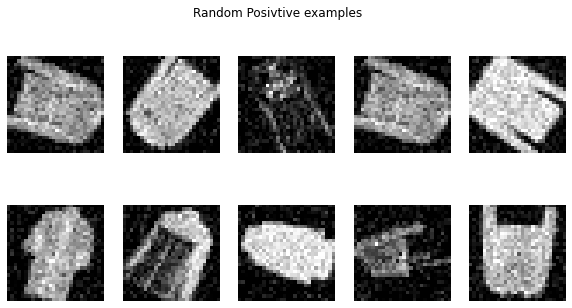

In [12]:
showIt(findIt(X_TRAIN, Y_TRAIN, 1), title= "Random Posivtive examples")

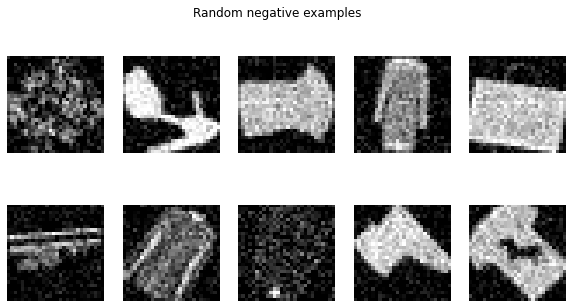

In [15]:
showIt(findIt(X_TRAIN, Y_TRAIN, -1), title= "Random negative examples")

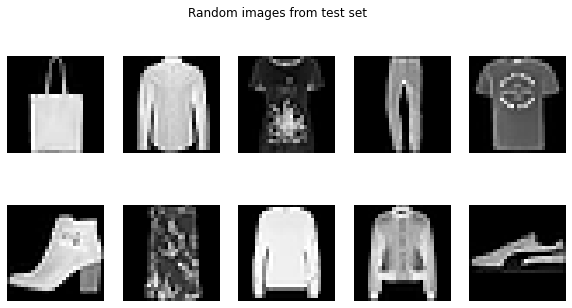

In [16]:
# show 10 random images from test set
showIt_rand(X_TEST, title= "Random images from test set")

### 3.Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this problem? Give the reasoning behind your choice(s).

In this case, where the class distribution is imbalanced with many more negative samples than positive samples, accuracy or AUC-ROC may not be the best performance metric to use. Instead metrix such as  PR curve and PR-AUC should be used to evaluate the performance.

As we disscused in the early question even a mjoraty class classifer will have a higher accuracy when there is a class imbalanced. Hence (closer to 80% for the train set in this senario), just the accuracy will not show the true performance of a solution for this dataset. Thus we need to consider other performance metric for this problem.

### 4.What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.
##### Answer
The expected accuracy for the train and test set would be 50%. we can use the following experiment to test this. S.
##### Code

In [22]:
num_samples = 3000
random_pred = np.random.choice([-1, 1], size=num_samples)
print(f"Accuracy of the random Classifer for train set: {accuracy_score(random_pred,Y_TRAIN)}")

Accuracy of the random Classifer for train set: 0.5093333333333333


### 5.What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

##### Answer



ROC-AUC for a random classifer is 0.50. this can pe proved using following proof (see the code section for this question). This is because there is no real distinction between positive and negative class. It means, the true positive rate (TPR) and false positive rate (FPR) are equal, resulting in a diagonal line in the ROC curve and an AUC of 0.50

For PR-AUC the area under the curve is 0.20. Which is the propotion of positive classe (20%) in this dataset. This is the propotion of positive samples.

ROC-AUC will be similer for both test and train sets. But for PR curve for test set this will be again similer to propotion of positive class.


ref: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
##### Code

ROC-AUC for a random classifer = 0.5068977494366912, PR-AUC for a random classifer = 0.20742970574601277


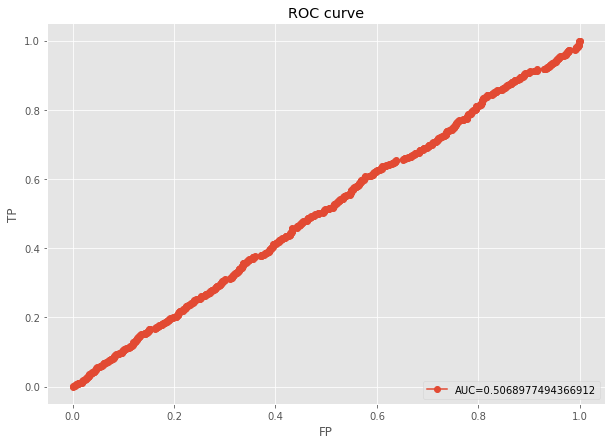

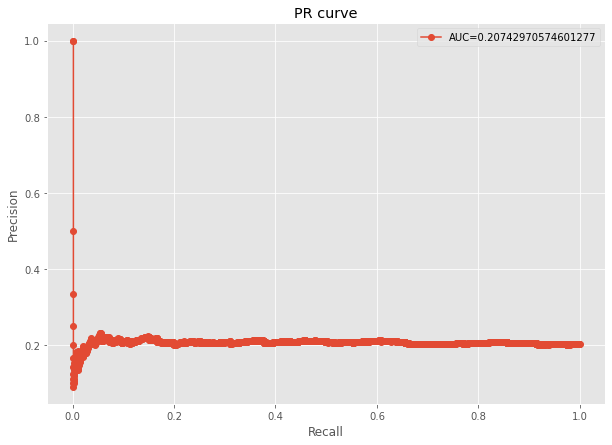

In [42]:
"""# create prediction probabilites with 0.5
rand_pred_prob = np.full((3000, 2), [0.5, 0.5])

# ROC-AUC
rand_fpr, rand_tpr,_ = roc_curve(Y_TRAIN,  rand_pred_prob[::,1])
rand_roc_auc = auc(rand_fpr,rand_tpr)

# PR-AUC
rand_precision, rand_recall, _ = precision_recall_curve(Y_TRAIN, rand_pred_prob[::,1])
rand_pr_auc = average_precision_score(rand_recall, rand_precision)"""

pred_prob = np.random.uniform(-1, 1, 3000)
#print(pred_prob)

# ROC-AUC
rand_fpr, rand_tpr,_ = roc_curve(Y_TRAIN,  pred_prob)
rand_roc_auc = auc(rand_fpr,rand_tpr)

# PR-AUC
rand_precision, rand_recall, _ = precision_recall_curve(Y_TRAIN, pred_prob)
rand_pr_auc = auc(rand_recall, rand_precision)



print(f"ROC-AUC for a random classifer = {rand_roc_auc}\
, PR-AUC for a random classifer = {rand_pr_auc}")

#plot ROC curve
plt.figure(figsize=(10,7))
plt.plot(rand_fpr,rand_tpr,'o-',label="AUC="+str(rand_roc_auc))
plt.title("ROC curve")
plt.ylabel('TP')
plt.xlabel('FP')
plt.legend(loc=4)
plt.show()

#plot PR curve
plt.figure(figsize=(10,7))
plt.plot(rand_recall,rand_precision, 'o-',label="AUC="+str(rand_pr_auc))
plt.title("PR curve")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=1)
plt.show()

## Question No. 2: (Nearest Neighbor Classifier) [15% Marks]
Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using a k=3 nearest neighbour (kNN) classifier and answer the following questions:

    1. What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting. 
    
    2. Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves? 

    3. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance? Why do you think this is the case?

###  1.What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting. 

In [52]:
# create 5 folds with skf
skf = StratifiedKFold(n_splits=5, shuffle= True)

In [107]:
# create empty lists to store the results
accuracies = []
balanced_accuracies = []
roc_aucs = []
pr_aucs = []
fprs = []
tprs = []

In [121]:
# train the classifier using skf
fold = 1
for train_index, test_index in skf.split(X_TRAIN, Y_TRAIN):
    #split the data
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = Y_TRAIN[train_index], Y_TRAIN[test_index]
    
    # fit the model and predict
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)
    #countIt(y_test)
    #countIt(y_train)
    
    # calculate the metrics
    accuracy = accuracy_score(y_test, y_pred) # accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred) # balanced_accuracy
    
    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test,  y_proba[:,1])
    # roc_auc = roc_auc_score(y_test,y_proba[:,1])
    roc_auc = auc(fpr,tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    
    #print(y_proba)
    
    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])
    pr_auc = average_precision_score(y_test, y_proba[:,1])
    
    print (f"Fold = {fold},\
    Accuracy = {round(accuracy,2)},\
    Balanced Accuracy = {round(balanced_accuracy,2)},\
    ROC-AUC = {round(roc_auc, 2)},\
    PR-AUC = {round(pr_auc, 2)}")
    
    fold +=1
    
    # store the results
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

# calculate the average and standard deviation for each metric
accuracy_mean, accuracy_std = np.mean(accuracies), np.std(accuracies)
balanced_accuracies_mean, balanced_accuracies_std = np.mean(balanced_accuracies), np.std(balanced_accuracies)
roc_auc_mean, roc_auc_std = np.mean(roc_aucs), np.std(roc_aucs)
pr_auc_mean, pr_auc_std = np.mean(pr_aucs), np.std(pr_aucs)

Fold = 1,    Accuracy = 0.88,    Balanced Accuracy = 0.81,    ROC-AUC = 0.91,    PR-AUC = 0.67
Fold = 2,    Accuracy = 0.88,    Balanced Accuracy = 0.81,    ROC-AUC = 0.9,    PR-AUC = 0.66
Fold = 3,    Accuracy = 0.87,    Balanced Accuracy = 0.8,    ROC-AUC = 0.9,    PR-AUC = 0.68
Fold = 4,    Accuracy = 0.88,    Balanced Accuracy = 0.81,    ROC-AUC = 0.88,    PR-AUC = 0.65
Fold = 5,    Accuracy = 0.85,    Balanced Accuracy = 0.77,    ROC-AUC = 0.84,    PR-AUC = 0.58


In [122]:
# create a tabel with pandas
d = {'Metrics': ["Accuracy","Balanced Accuracy", "ROC-AUC", "PR-AUC"], 
     'Mean': [accuracy_mean,balanced_accuracies_mean, roc_auc_mean, pr_auc_mean],
    'standard deviation': [accuracy_std, balanced_accuracies_std, roc_auc_std, pr_auc_std]}
# create a datafram
tabel = pd.DataFrame(data = d, index = None)
tabel

,Metrics,Mean,standard deviation
0,Accuracy,0.870917,0.012861
1,Balanced Accuracy,0.799880,0.021231
2,ROC-AUC,0.881500,0.019247
3,PR-AUC,0.637352,0.044909


### 2. Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves? 
#### Answer
we are going to plot the curves for the last fold

An AUC-ROC of 0.88 indicates that the classifier is performing well, as it is able to distinguish between positive and negative examples with high accuracy.

An AUC-PR of 0.62 indicates that the classifier is not performing well with this data, which means it may not be able to catch all the positive samples.

#### Code

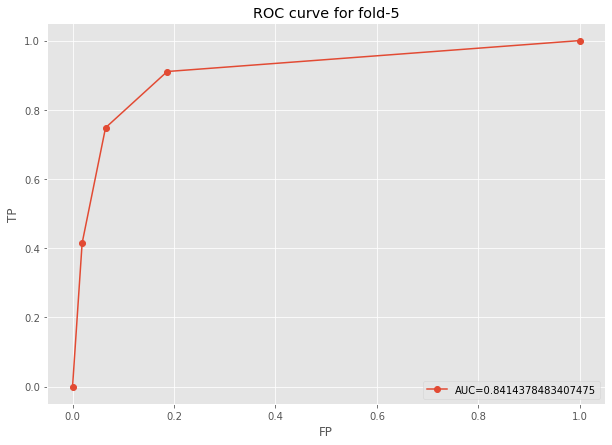

In [126]:
#plot ROC curve
plt.figure(figsize=(10,7))
plt.plot(fprs[4],tprs[4], 'o-',label="AUC="+str(roc_auc))
plt.title("ROC curve for fold-5")
plt.ylabel('TP')
plt.xlabel('FP')
plt.legend(loc=4)
plt.show()

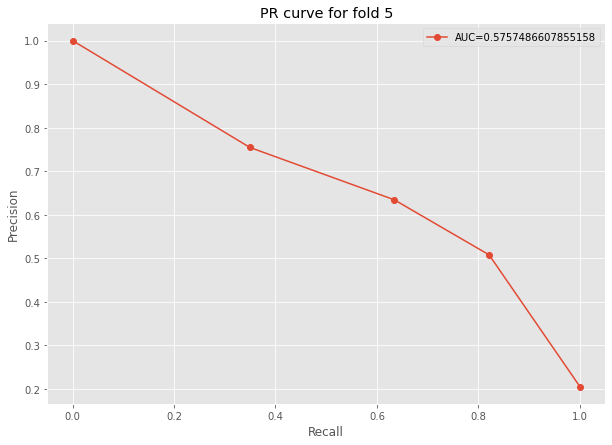

In [127]:
#plot PR curve
plt.figure(figsize=(10,7))
plt.plot(recall,precision,'o-',label="AUC="+str(pr_auc))
plt.title("PR curve for fold 5")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=1)
plt.show()

### 3. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance? Why do you think this is the case?

#### Answer

For this expriment we are using 6 pre - processinig methods. 
       
       1.Standard scaling
       2.Mean
       3.Standard deviation
       4.Min-max scaling
       5.Normalize
       6.Quantile transformation
There are all part of ``` sklearn.preprocessing ```

It is observable that the pre-processing tecnique does not effect the accuracy for this dataset. There are number of possible reasons for this. It's also possible that your dataset is already balanced and clean, so it doesn't require any pre-processing. Also the data might be in a format that KNN algoritham already works well with. Moreover the data set is already in a 0-255 scale and all the values are between that.

#### Code

In [39]:
# creating 3 subcopies with diffrent pre-processing methods
# std scaler with mean and standard deviation
std_scaller = preprocessing.StandardScaler().fit(X_TRAIN)
X_Train_std = std_scaller.transform(X_TRAIN)

#using mean
mean_scaller = preprocessing.StandardScaler(with_std = False).fit(X_TRAIN)
X_Train_mean = mean_scaller.transform(X_TRAIN)

#using standard deviation
std_dev_scaller = preprocessing.StandardScaler(with_mean = False).fit(X_TRAIN)
X_Train_std_dev = std_dev_scaller.transform(X_TRAIN)

# Range of 0-1
min_max_scaller = preprocessing.MinMaxScaler().fit(X_TRAIN)
X_Train_min_max = min_max_scaller.transform(X_TRAIN)

# Normalise
normalizer = preprocessing.Normalizer().fit(X_TRAIN)
X_normalise = normalizer.transform(X_TRAIN)

#quantile transformation Mapping to a Uniform distribution
quantile_transformer = preprocessing.QuantileTransformer().fit(X_TRAIN)
X_quantile = quantile_transformer.transform(X_TRAIN)

In [19]:
def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

In [152]:
# use cross validation to find the best pre prcessing method. 
# This function will be used in all the following question to run the evaluation

def eval_it(X_TRAIN, Y_TRAIN, raw_model = KNeighborsClassifier(n_neighbors=3), folds = 5, proba = True):
    
    acc = []
    b_acc = []
    roc_aucs = []
    pr_aucs = []
    roc_auc = 0
    pr_auc = 0
    fold = 1
    
    # skf
    skf = StratifiedKFold(n_splits=5, shuffle= True)
    
    for train_index, test_index in skf.split(X_TRAIN, Y_TRAIN):
        #split the data
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = Y_TRAIN[train_index], Y_TRAIN[test_index]

        # fit the model and predict
        model = copy.deepcopy(raw_model) #reset the model each time
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        

        # calculate the metrics
        accuracy = accuracy_score(y_test, y_pred) # accuracy
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred) # balanced_accuracy
        
        if proba:
            y_proba = model.predict_proba(X_test)

            # ROC-AUC
            fpr, tpr,_ = roc_curve(y_test,  y_proba[:,1], pos_label= 1)
            roc_auc = auc(fpr,tpr)
           # plotPRC(y_test, y_proba[::,1])


            # PR-AUC
            precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1], pos_label = 1)
            pr_auc = average_precision_score(y_test, y_proba[:,1])
        
        if not(proba):
            y_proba = model.decision_function(X_test)
            
            # ROC-AUC
            fpr, tpr,_ = roc_curve(y_test,  y_proba, pos_label=1)
            roc_auc = auc(fpr,tpr)
            
            # PR-AUC
            precision, recall, _ = precision_recall_curve(y_test, y_proba, pos_label=1)
            pr_auc = average_precision_score(y_test, y_proba)
            
            
        
           # plotPRC(y_test, y_proba)
            

        print (f"Fold = {fold},\
        Accuracy = {round(accuracy,2)}\
        Balanced Accuracy = {round(balanced_accuracy,2)},\
        ROC-AUC = {round(roc_auc, 2)},\
        PR-AUC = {round(pr_auc, 2)}")

        fold +=1

        # store the results
        acc.append(accuracy)
        b_acc.append(balanced_accuracy)
        roc_aucs.append(roc_auc)
        pr_aucs.append(pr_auc)
    
    #plt.figure(figsize=(10,8))
    #print (recall)
    #print (precision)
    

    #plt.plot(recall,precision,'o-')
    
    print(".............................................................................................................")
    return [acc, b_acc, roc_aucs, pr_aucs, fpr, tpr, recall, precision]

In [132]:
print("Min Max scaller")
min_max_acc = eval_it(X_Train_min_max, Y_TRAIN)[0]
print("Mean Scaller")
mean_std_acc = eval_it(X_Train_mean, Y_TRAIN)[0]
print("Std_dev scaller")
std_dev_std_acc = eval_it(X_Train_std_dev, Y_TRAIN)[0]
print("Std scaller")
std_acc = eval_it(X_Train_std, Y_TRAIN)[0]
print("Normalizer")
norm_acc = eval_it (X_normalise,Y_TRAIN)[0]
print("Quantile transformation")
quantile_acc = eval_it(X_quantile, Y_TRAIN)[0]

Min Max scaller
Fold = 1,        Accuracy = 0.87        Balanced Accuracy = 0.79,        ROC-AUC = 0.91,        PR-AUC = 0.66
Fold = 2,        Accuracy = 0.87        Balanced Accuracy = 0.78,        ROC-AUC = 0.87,        PR-AUC = 0.64
Fold = 3,        Accuracy = 0.88        Balanced Accuracy = 0.82,        ROC-AUC = 0.91,        PR-AUC = 0.7
Fold = 4,        Accuracy = 0.88        Balanced Accuracy = 0.82,        ROC-AUC = 0.89,        PR-AUC = 0.62
Fold = 5,        Accuracy = 0.86        Balanced Accuracy = 0.77,        ROC-AUC = 0.86,        PR-AUC = 0.6
.............................................................................................................
Mean Scaller
Fold = 1,        Accuracy = 0.86        Balanced Accuracy = 0.81,        ROC-AUC = 0.9,        PR-AUC = 0.63
Fold = 2,        Accuracy = 0.9        Balanced Accuracy = 0.82,        ROC-AUC = 0.89,        PR-AUC = 0.68
Fold = 3,        Accuracy = 0.86        Balanced Accuracy = 0.76,        ROC-AUC = 0.89,       

In [190]:
# Creating a tabel with all the scores
d = {'Pre-Processing Method': ["Mean","Standard Deviation", 
                               "Std Scaler", 
                               "Min-Max with 0-1", 
                               "Normalizer", 
                               "Quantile transformation"], 
     
     'Mean accuracy': [np.mean(mean_std_acc),
                       np.mean(std_dev_std_acc), 
                       np.mean(std_acc), 
                       np.mean(min_max_acc), 
                       np.mean(norm_acc), 
                       np.mean(quantile_acc)],
    
     'Standard deviation': [np.std(mean_std_acc),
                           np.std(std_dev_std_acc), 
                           np.std(std_acc), 
                           np.std(min_max_acc), 
                           np.std(norm_acc), 
                           np.std(quantile_acc)]}
# create a datafram
tabel = pd.DataFrame(data = d, index = None)
tabel

,Pre-Processing Method,Mean accuracy,Standard deviation
0,Mean,0.870000,0.013250
1,Standard Deviation,0.879667,0.007557
2,Std Scaler,0.868000,0.008327
3,Min-Max with 0-1,0.871667,0.007601
4,Normalizer,0.877000,0.007409
5,Quantile transformation,0.866333,0.006616


### Question No. 3:  [20% Marks] CV

Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: Perceptron, Naïve Bayes Classifier, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (C and kernel type and kernel hyper-parameters for SVM etc). Report the cross validation results (mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data. 
    
    1.Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier. 
    2.Show the comparison of these classifiers using a single consolidated table
    3.Plot the ROC curves of all classifiers on the same axes for easy comparison. 
    4.Plot the PR curves of all classifier on the same axes for comparison. 
    5.Write your observations about the ROC and PR curves. 


#### 1.Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier.

Assuming we don’t have to take the computational complexity into consideration we can use the following steps to find the best classifier among the suggested classifiers.

    1. Since we already know that pre processing does not have an effect on the dataset we are not going to use pre processing for this step.
    2. Using StratifiedKFold we are going to split the data into 5 folds. After for each classfer we will use 1 fold to test the model and 4 other to train.
    3. Then for each classifier type, tune the hyperparameters using gridsearch.
    4. the use the best parameters to find the accuracy, balance accuracy, AUC-ROC and PR-AUC
    5. For each classifier we will use accuracy, balanced accuracy, AUC-ROC and AUC-PR scores for each fold and use mean and standard deviation of these scores across all the folds to find the best classifier.
    
From that we can observe that kernal SVM has the best performance for this dataset.

    best param for Kernel SVM is SVC(C=20, class_weight='balanced')
with this model we can see that the standerd deviation for values are 0.1 or close this means that the model is robust.

In [29]:
# models
perceptron = Perceptron()
naive_bayes = GaussianNB()
linear_svm = LinearSVC()
kernel_svm = SVC(kernel= 'poly' )

In [30]:
# Parameter for gridsearch for each classifier
param_perceptron = {'max_iter': [10, 100, 1000, 2000]}

param_naive_bayes = {'var_smoothing': [1, 10, 100],
                    'priors':[(0.205, 0.795), (0.795, 0.205)]}

param_linear_svm = {'C': [0.1, 1, 10],
                   'class_weight': ["balanced",{0:1.0, 1:4.0}], 
                    'max_iter': [1000,10000,15000]}

param_kernel_svm = {'C': [0.1, 1, 10, 20, 30],
                    'kernel': ['poly', 'rbf','sigmoid'],
                   'gamma': ['auto', 'scale'],
                   'class_weight': ["balanced",{0:1.0, 1:4.0}]}

In [31]:
# create a dict of models and param
models = {"Perceptron":(perceptron, param_perceptron),
         "Naive Bayes":(naive_bayes, param_naive_bayes),
         "Linear SVM": (linear_svm, param_linear_svm),
         "Kernel SVM": (kernel_svm, param_kernel_svm)}

In [18]:
# Perform 5-fold stratified CV to find the best hyperparameters. 
# this takes long time to run :(
for name, (clf, param) in models.items():
    scores = {}
    grid_search = GridSearchCV(estimator=clf, 
                               param_grid=param, 
                               cv=RepeatedStratifiedKFold(n_repeats=1, n_splits = 5), 
                               verbose= 3, 
                               scoring= "average_precision")
    grid_search.fit(X_TRAIN, Y_TRAIN)
    print(f"best param for {name} is {grid_search.best_estimator_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................max_iter=10; total time=   0.0s
[CV] END ........................................max_iter=10; total time=   0.0s
[CV] END ........................................max_iter=10; total time=   0.0s
[CV] END ........................................max_iter=10; total time=   0.0s
[CV] END ........................................max_iter=10; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.2s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.1s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................ma

[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=0.1, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=1, class_weight=balanced, loss=hinge, max_iter=1000; total time=   1.8s
[CV] END C=1, class_weight=balanced, loss=hinge, max_iter=1000; total time=   1.6s
[CV] END C=1, clas

[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=10000; total time=  10.6s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=10000; total time=  10.1s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=10000; total time=  12.9s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=15000; total time=  18.1s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=15000; total time=  16.3s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=15000; total time=  15.9s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=15000; total time=  15.4s
[CV] END C=10, class_weight=balanced, loss=squared_hinge, max_iter=15000; total time=  16.3s
[CV] END C=10, class_weight={0: 1.0, 1: 4.0}, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END C=10, class_weight={0: 1.0, 1: 4.0}, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END C=10, class_weight={0: 1.0, 1: 4.0}, loss=hinge, max_iter=1000;

[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=10000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, loss=squared_hinge, max_iter=15000; total tim

[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=sigmoid; t

[CV] END C=10, class_weight=balanced, gamma=auto, kernel=poly; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=poly; total time=   1.2s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=poly; total time=   1.2s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.9s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.9s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   4.0s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   4.3s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   3.7s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   3.7s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   4.4s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   3.2s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   3.3s
[CV] END C=10, 

[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=20, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=sigmoid; total time=

In [153]:
# for a Perceptron
# This does not converge.
#------------------------------------------------------------------------------------------------------------------------------
print("Perceptron")
perceptron_scores = eval_it(X_TRAIN, Y_TRAIN, raw_model= Perceptron(max_iter=10), proba=False)
print("Mean")
print(f"Accuracy = {round(np.mean(perceptron_scores[0]),2)},\t Balanced Accuracy = {round(np.mean(perceptron_scores[1]),2)},\t \
ROC-AUC = {round(np.mean(perceptron_scores[2]),2)},\t PR-AUC = {round(np.mean(perceptron_scores[3]),2)}")

print("Standard Deviation")
print(f"Accuracy = {round(np.std(perceptron_scores[0]),2)},\t Balanced Accuracy = {round(np.std(perceptron_scores[1]),2)},\t \
ROC-AUC = {round(np.std(perceptron_scores[2]),2)},\t PR-AUC = {round(np.std(perceptron_scores[3]),2)}")

print(".............................................................................................................")


# for a Naive Bayes
#------------------------------------------------------------------------------------------------------------------------------
print("Naive Bayes")
nb_scores = eval_it(X_TRAIN, Y_TRAIN, raw_model= GaussianNB(priors=(0.795, 0.205), var_smoothing=10))

print("Mean")
print(f"Accuracy = {round(np.mean(nb_scores[0]),2)},\t Balanced Accuracy = {round(np.mean(nb_scores[1]),2)},\t \
ROC-AUC = {round(np.mean(nb_scores[2]),2)},\t PR-AUC = {round(np.mean(nb_scores[3]),2)}")

print("Standard Deviation")
print(f"Accuracy = {round(np.std(nb_scores[0]),2)},\t Balanced Accuracy = {round(np.std(nb_scores[1]),2)},\t \
ROC-AUC = {round(np.std(nb_scores[2]),2)},\t PR-AUC = {round(np.std(nb_scores[3]),2)}")

print(".............................................................................................................")

# for a Linear SVM
#------------------------------------------------------------------------------------------------------------------------------
print("Linear SVM")

lsvm_scores = eval_it(X_TRAIN, Y_TRAIN, raw_model= LinearSVC(C=0.1, class_weight='balanced', loss='hinge'), proba= False)

print("Mean")
print(f"Accuracy = {round(np.mean(lsvm_scores[0]),2)},\t Balanced Accuracy = {round(np.mean(lsvm_scores[1]),2)},\t \
ROC-AUC = {round(np.mean(lsvm_scores[2]),2)},\t PR-AUC = {round(np.mean(lsvm_scores[3]),2)}")

print("Standard Deviation")
print(f"Accuracy = {round(np.std(lsvm_scores[0]),2)},\t Balanced Accuracy = {round(np.std(lsvm_scores[1]),2)},\t \
ROC-AUC = {round(np.std(lsvm_scores[2]),2)},\t PR-AUC = {round(np.std(lsvm_scores[3]),2)}")

print(".............................................................................................................")

# for a Kernel SVM
#------------------------------------------------------------------------------------------------------------------------------
print("Kernel SVM")
ksvm_scores = eval_it(X_TRAIN, Y_TRAIN, raw_model= SVC(C=30, class_weight='balanced'), proba= False)

print("Mean")
print(f"Accuracy = {round(np.mean(ksvm_scores[0]),2)},\t Balanced Accuracy = {round(np.mean(ksvm_scores[1]),2)},\t \
ROC-AUC = {round(np.mean(ksvm_scores[2]),2)},\t PR-AUC = {round(np.mean(ksvm_scores[3]),2)}")

print("Standard Deviation")
print(f"Accuracy = {round(np.std(ksvm_scores[0]),2)},\t Balanced Accuracy = {round(np.std(ksvm_scores[1]),2)},\t \
ROC-AUC = {round(np.std(ksvm_scores[2]),2)},\t PR-AUC = {round(np.std(ksvm_scores[3]),2)}")

print(".............................................................................................................")

Perceptron
Fold = 1,        Accuracy = 0.8        Balanced Accuracy = 0.77,        ROC-AUC = 0.87,        PR-AUC = 0.64
Fold = 2,        Accuracy = 0.83        Balanced Accuracy = 0.7,        ROC-AUC = 0.85,        PR-AUC = 0.59
Fold = 3,        Accuracy = 0.79        Balanced Accuracy = 0.76,        ROC-AUC = 0.85,        PR-AUC = 0.63
Fold = 4,        Accuracy = 0.84        Balanced Accuracy = 0.71,        ROC-AUC = 0.84,        PR-AUC = 0.64
Fold = 5,        Accuracy = 0.84        Balanced Accuracy = 0.77,        ROC-AUC = 0.85,        PR-AUC = 0.63
.............................................................................................................
Mean
Accuracy = 0.82,	 Balanced Accuracy = 0.74,	 ROC-AUC = 0.85,	 PR-AUC = 0.63
Standard Deviation
Accuracy = 0.02,	 Balanced Accuracy = 0.03,	 ROC-AUC = 0.01,	 PR-AUC = 0.02
.............................................................................................................
Naive Bayes
Fold = 1,        Accuracy = 0.71 

#### 2.Show the comparison of these classifiers using a single consolidated table

We are going to use the information from the last question and show the mean values as following.

From that we can conclude that Kernal SVM has the best performance for this dataset

In [191]:
print("Mean values for all classifers")
d = {'_': ["Accuracy","Balanced Accuracy", "ROC-AUC", "PR-AUC"], 
     
     'Perceptron': [round(np.mean(perceptron_scores[0]),2),
                  round(np.mean(perceptron_scores[1]),2),
                  round(np.mean(perceptron_scores[2]),2),
                  round(np.mean(perceptron_scores[3]),2)],
    
     'Naive Bayes': [round(np.mean(nb_scores[0]),2),
                  round(np.mean(nb_scores[1]),2),
                  round(np.mean(nb_scores[2]),2),
                  round(np.mean(nb_scores[3]),2)],
    
     'Linear SVM': [round(np.mean(lsvm_scores[0]),2),
                  round(np.mean(lsvm_scores[1]),2),
                  round(np.mean(lsvm_scores[2]),2),
                  round(np.mean(lsvm_scores[3]),2)],
    
     'Kernel SVM': [round(np.mean(ksvm_scores[0]),2),
                  round(np.mean(ksvm_scores[1]),2),
                  round(np.mean(ksvm_scores[2]),2),
                  round(np.mean(ksvm_scores[3]),2)]}

d2 = {'_': ["Accuracy","Balanced Accuracy", "ROC-AUC", "PR-AUC"], 
     
     'Perceptron': [round(np.std(perceptron_scores[0]),2),
                  round(np.std(perceptron_scores[1]),2),
                  round(np.std(perceptron_scores[2]),2),
                  round(np.std(perceptron_scores[3]),2)],
    
     'Naive Bayes': [round(np.std(nb_scores[0]),2),
                  round(np.std(nb_scores[1]),2),
                  round(np.std(nb_scores[2]),2),
                  round(np.std(nb_scores[3]),2)],
    
     'Linear SVM': [round(np.std(lsvm_scores[0]),2),
                  round(np.std(lsvm_scores[1]),2),
                  round(np.std(lsvm_scores[2]),2),
                  round(np.std(lsvm_scores[3]),2)],
    
     'Kernel SVM': [round(np.std(ksvm_scores[0]),2),
                  round(np.std(ksvm_scores[1]),2),
                  round(np.std(ksvm_scores[2]),2),
                  round(np.std(ksvm_scores[3]),2)]}
# create a datafram
tabel = pd.DataFrame(data = d, index = None)
tabel2 = pd.DataFrame(data = d2, index = None)
tabel

Mean values for all classifers


,_,Perceptron,Naive Bayes,Linear SVM,Kernel SVM
0,Accuracy,0.82,0.72,0.77,0.88
1,Balanced Accuracy,0.74,0.73,0.68,0.80
2,ROC-AUC,0.85,0.80,0.75,0.92
3,PR-AUC,0.63,0.54,0.48,0.75


In [192]:
print("Standard deviation values for all classifers")
tabel2

Standard deviation values for all classifers


,_,Perceptron,Naive Bayes,Linear SVM,Kernel SVM
0,Accuracy,0.02,0.01,0.01,0.01
1,Balanced Accuracy,0.03,0.01,0.02,0.03
2,ROC-AUC,0.01,0.02,0.01,0.01
3,PR-AUC,0.02,0.04,0.02,0.01


#### 3.Plot the ROC curves of all classifiers on the same axes for easy comparison.


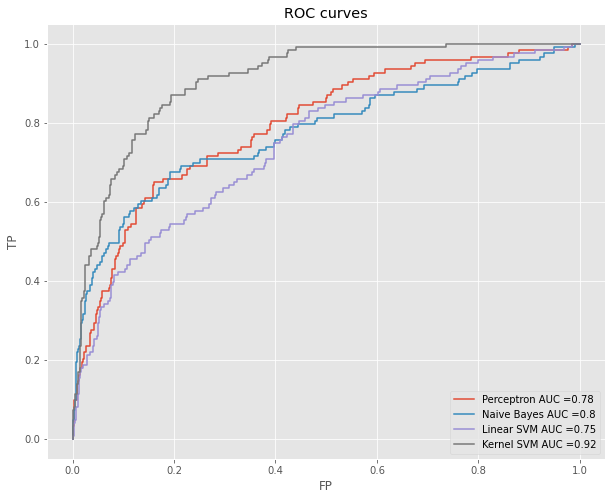

In [151]:
# [acc, b_acc, roc_aucs, pr_aucs, fpr, tpr, precision, recall]
#plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(perceptron_scores[4],perceptron_scores[5],'-',label=f"Perceptron AUC ={round(np.mean(perceptron_scores[2]),2)}")
plt.plot(nb_scores[4],nb_scores[5],'-',label=f"Naive Bayes AUC ={round(np.mean(nb_scores[2]),2)}")
plt.plot(lsvm_scores[4],lsvm_scores[5],'-',label=f"Linear SVM AUC ={round(np.mean(lsvm_scores[2]),2)}")
plt.plot(ksvm_scores[4],ksvm_scores[5],'-',label=f"Kernel SVM AUC ={round(np.mean(ksvm_scores[2]),2)}")
plt.title("ROC curves")
plt.ylabel('TP')
plt.xlabel('FP')
plt.legend(loc=4)
plt.show()

#### 4.Plot the PR curves of all classifier on the same axes for comparison. 

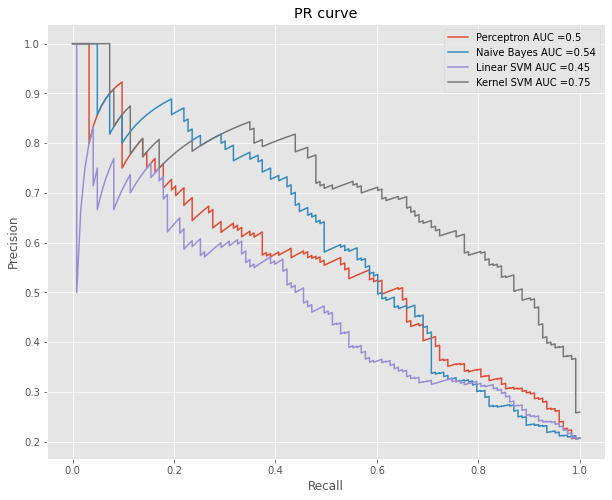

In [150]:
#plot PR curve
plt.figure(figsize=(10,8))
plt.plot(perceptron_scores[6],perceptron_scores[7],'-',label=f"Perceptron AUC ={round(np.mean(perceptron_scores[3]),2)}")
plt.plot(nb_scores[6],nb_scores[7],'-',label=f"Naive Bayes AUC ={round(np.mean(nb_scores[3]),2)}")
plt.plot(lsvm_scores[6],lsvm_scores[7],'-',label=f"Linear SVM AUC ={round(np.mean(lsvm_scores[3]),2)}")
plt.plot(ksvm_scores[6],ksvm_scores[7],'-',label=f"Kernel SVM AUC ={round(np.mean(ksvm_scores[3]),2)}")
plt.title("PR curve")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=1)
plt.show()

#### 5.Write your observations about the ROC and PR curves.

When we observe the ROC curve it is possible to see that kernal SVM performs better than all the other algorithams. Also the PR curve cement this fact more. However, when observing PR curve we can see that PR curve can be improved.
And if an algoritham is better in ROC curve it is also better in PRC in that given threshold.

### Question No. 4 [20% Marks] PCA

    i.	Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?
    ii.	Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set  in a different color (or marker style). What are your observations about the data based on this plot? 
    iii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set. 
    iv.	Reduce the number of dimensions of the data using PCA and perform classification.  What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!


#### 1.Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?
##### Answers

This suggests that the two classes have similar variances or spread in the data, but different means or directions of variation. The direction of variation captured by the first PCA component separates the two classes, with one class mostly on the right and the other class mostly on the left.

This indicates that while the data may not be linearly separable in the original feature space, the PCA projection has helped to make the two classes more distinct in the two-dimensional space.

##### Code

In [52]:
# reduce the number of dimensions to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_TRAIN)

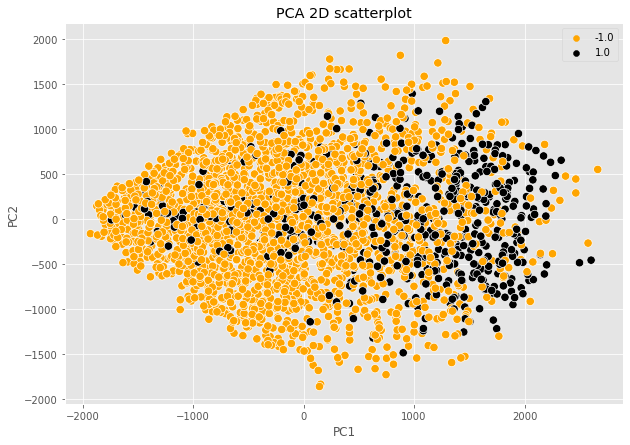

In [53]:
# plot it
plt.figure(figsize=(10,7))
sns.scatterplot(x = X_pca[:,0], 
                y= X_pca[:,1], 
                s = 70,
                hue= Y_TRAIN, palette=["orange", "black"])

plt.title("PCA 2D scatterplot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### ii.    Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set  in a different color (or marker style). What are your observations about the data based on this plot?

##### Answer
plot suggests that the two classes (test, train) have different variances or spread in the data. The class (train) that is mostly in the center has a smaller variance and is more tightly clustered, while the class on the sides has a larger variance and is more spread out. THis also sudjest that data is linearly not separable.

##### Code

In [156]:
X_ALL = np.concatenate((X_TRAIN, X_TEST), axis=0)
Y_ALL = np.array(['train'] * 3000 + ['test'] * 3000)

In [157]:
# reduce the number of dimensions to 2 using PCA
pca_all = PCA(n_components=2)
X_all_pca = pca_all.fit_transform(X_ALL)

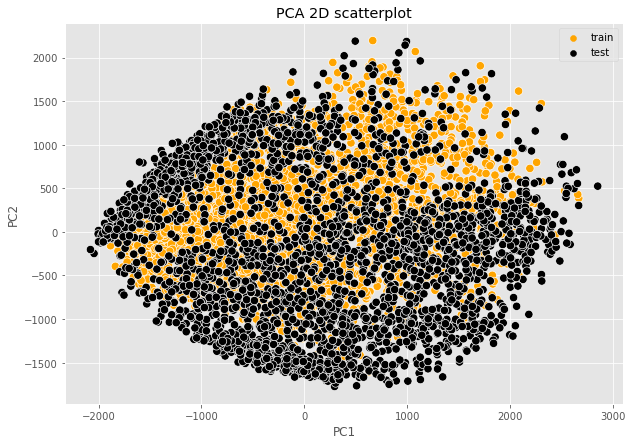

In [158]:
# plot it
plt.figure(figsize=(10,7))
sns.scatterplot(x = X_all_pca[:,0], y= X_all_pca[:,1], s = 70,
               hue= Y_ALL, palette=["orange", "black"])

plt.title("PCA 2D scatterplot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### iii.Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set. 
##### Answer

Number of dimensions is  314

##### Code

In [159]:
# reduce the number of dimensions to 2 using PCA
pca95 = PCA(n_components= 0.95)
pca95.fit(X_TRAIN)
projected95 = pca95.transform(X_TRAIN)#projecting the data onto Principal components
#print(X_TRAIN.shape)
print(f"Number of dimentions that explain 95% variance is = {projected95.shape[1]}")

Number of dimentions that explain 95% variance is = 314


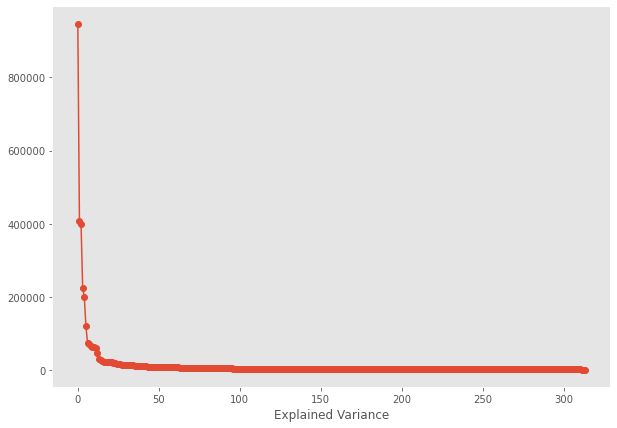

<Figure size 720x504 with 0 Axes>

In [160]:
# Retrieve the explained variance ratios of each principal component
plt.figure(figsize=(10,7))
plt.plot(pca95.explained_variance_ , 'o-',) 
plt.grid()
plt.xlabel('Explained Variance')
plt.figure()
plt.show()

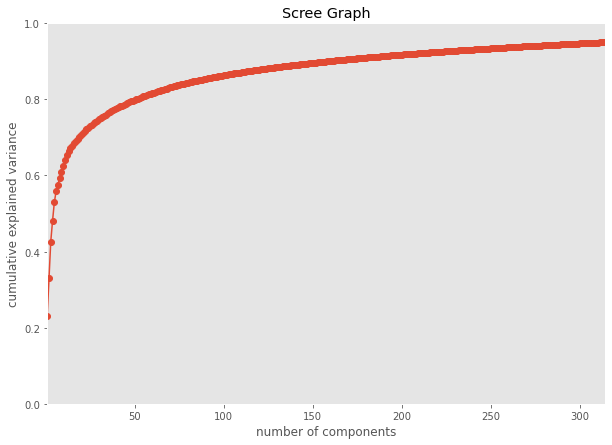

In [161]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(pca95.explained_variance_ratio_))+1,
         np.cumsum(pca95.explained_variance_ratio_),
         'o-') #plot the scree graph
plt.axis([1,len(pca95.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree Graph')
plt.grid()
plt.show()

#### iv. Reduce the number of dimensions of the data using PCA and perform classification.  What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [193]:
# do the grid search
grid_search = GridSearchCV(kernel_svm,
                           param_kernel_svm, 
                           cv = RepeatedStratifiedKFold(n_repeats=1, n_splits = 5),
                           scoring= "average_precision",
                           verbose= 3)

grid_search.fit(projected95, Y_TRAIN)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=poly;, score=0.707 total time=   0.7s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=poly;, score=0.711 total time=   0.7s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=poly;, score=0.701 total time=   0.5s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=poly;, score=0.760 total time=   0.5s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=poly;, score=0.710 total time=   0.3s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.248 total time=   1.7s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.229 total time=   1.5s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.229 total time=   2.3s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.209 total time=   2.3s
[CV 5/5] END C=0.1, class_weight=balanced,

[CV 1/5] END C=1, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.656 total time=   0.5s
[CV 2/5] END C=1, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.739 total time=   0.7s
[CV 3/5] END C=1, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.715 total time=   0.5s
[CV 4/5] END C=1, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.763 total time=   0.5s
[CV 5/5] END C=1, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.682 total time=   0.4s
[CV 1/5] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.406 total time=   0.3s
[CV 2/5] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.385 total time=   0.3s
[CV 3/5] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.494 total time=   0.3s
[CV 4/5] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.510 total time=   0.4s
[CV 5/5] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.420 total time=   0.3s


[CV 5/5] END C=10, class_weight={0: 1.0, 1: 4.0}, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=20, class_weight=balanced, gamma=auto, kernel=poly;, score=0.707 total time=   0.6s
[CV 2/5] END C=20, class_weight=balanced, gamma=auto, kernel=poly;, score=0.711 total time=   0.5s
[CV 3/5] END C=20, class_weight=balanced, gamma=auto, kernel=poly;, score=0.701 total time=   0.5s
[CV 4/5] END C=20, class_weight=balanced, gamma=auto, kernel=poly;, score=0.760 total time=   0.5s
[CV 5/5] END C=20, class_weight=balanced, gamma=auto, kernel=poly;, score=0.710 total time=   0.5s
[CV 1/5] END C=20, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.248 total time=   1.4s
[CV 2/5] END C=20, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.229 total time=   1.4s
[CV 3/5] END C=20, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.229 total time=   1.3s
[CV 4/5] END C=20, class_weight=balanced, gamma=auto, kernel=rbf;, score=0.209 total time=   1.3s
[CV 

[CV 5/5] END C=30, class_weight=balanced, gamma=scale, kernel=poly;, score=0.711 total time=   0.4s
[CV 1/5] END C=30, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.689 total time=   0.4s
[CV 2/5] END C=30, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.766 total time=   0.4s
[CV 3/5] END C=30, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.747 total time=   0.4s
[CV 4/5] END C=30, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.759 total time=   0.5s
[CV 5/5] END C=30, class_weight=balanced, gamma=scale, kernel=rbf;, score=0.728 total time=   0.5s
[CV 1/5] END C=30, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.381 total time=   0.2s
[CV 2/5] END C=30, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.356 total time=   0.3s
[CV 3/5] END C=30, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.480 total time=   0.2s
[CV 4/5] END C=30, class_weight=balanced, gamma=scale, kernel=sigmoid;, score=0.487 total time= 

In [172]:
pcaSVM_scores = eval_it(projected95, Y_TRAIN, raw_model= SVC(C=10, class_weight='balanced'), proba=False)
print("Mean")
print(f"Accuracy = {round(np.mean(pcaSVM_scores[0]),2)},\t Balanced Accuracy = {round(np.mean(pcaSVM_scores[1]),2)},\t \
ROC-AUC = {round(np.mean(pcaSVM_scores[2]),2)},\t PR-AUC = {round(np.mean(pcaSVM_scores[3]),2)}")

print("Standard Deviation")
print(f"Accuracy = {round(np.std(pcaSVM_scores[0]),2)},\t Balanced Accuracy = {round(np.std(pcaSVM_scores[1]),2)},\t \
ROC-AUC = {round(np.std(pcaSVM_scores[2]),2)},\t PR-AUC = {round(np.std(pcaSVM_scores[3]),2)}")

Fold = 1,        Accuracy = 0.86        Balanced Accuracy = 0.78,        ROC-AUC = 0.92,        PR-AUC = 0.74
Fold = 2,        Accuracy = 0.84        Balanced Accuracy = 0.75,        ROC-AUC = 0.9,        PR-AUC = 0.69
Fold = 3,        Accuracy = 0.88        Balanced Accuracy = 0.8,        ROC-AUC = 0.93,        PR-AUC = 0.77
Fold = 4,        Accuracy = 0.89        Balanced Accuracy = 0.81,        ROC-AUC = 0.93,        PR-AUC = 0.73
Fold = 5,        Accuracy = 0.88        Balanced Accuracy = 0.8,        ROC-AUC = 0.91,        PR-AUC = 0.76
.............................................................................................................
Mean
Accuracy = 0.87,	 Balanced Accuracy = 0.79,	 ROC-AUC = 0.92,	 PR-AUC = 0.74
Standard Deviation
Accuracy = 0.02,	 Balanced Accuracy = 0.02,	 ROC-AUC = 0.01,	 PR-AUC = 0.03


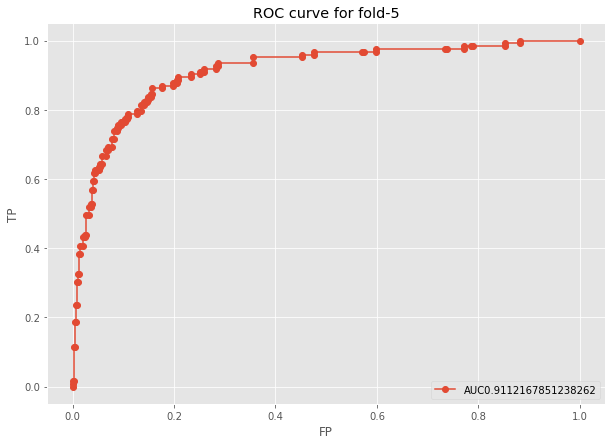

In [173]:
#plot ROC curve
plt.figure(figsize=(10,7))
plt.plot(pcaSVM_scores[4],pcaSVM_scores[5], 'o-', label = "AUC" + str(auc(pcaSVM_scores[4],pcaSVM_scores[5])))
plt.title("ROC curve for fold-5")
plt.ylabel('TP')
plt.xlabel('FP')
plt.legend(loc=4)
plt.show()

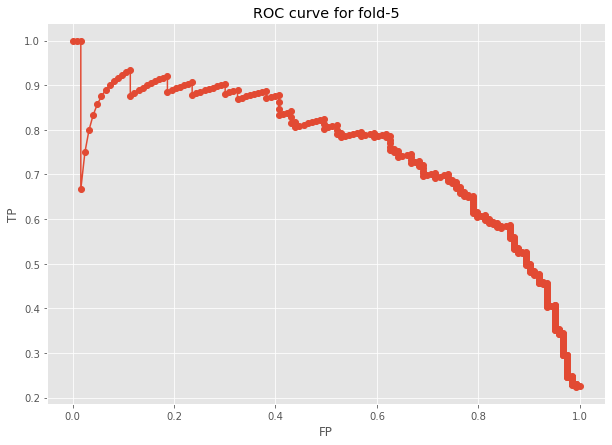

In [174]:
#plot PR curve
plt.figure(figsize=(10,7))
plt.plot(pcaSVM_scores[6],pcaSVM_scores[7], 'o-',)
plt.title("ROC curve for fold-5")
plt.ylabel('TP')
plt.xlabel('FP')
#plt.legend(loc=4)
plt.show()

## Question No. 5 [15% Marks]
Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools or approaches at your disposal.  However, no external data sources may be used. Describe your pipeline and report your outputs over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order as the order of the test examples in Xtest!). Your prediction file should be named by your student ID, e.g., u100011.csv. 

##### Answer

It was decided to use a CNN for this problem. initially the training data was reshaped from [3000, 728] to [3000,28,28,1]. Afterwords Y_Train was converted with one hot encoding. After that a negative example is [1,0] and a positive example is [0,1]. Then a Sequential model was build using keras. This has a Conv2D layer follwoed by a maxpooling layer again followed by 
Conv2D layer and a maxpooling layer. Then a Flatten layer to make a one dimensional tensor that will be passed on to the a Dense layer and a dropout layer. output layer is a Dense layer with a softmax activation function. all the other layers had RELU activation function.

The model will be complied with Adam optimizer and binary_crossentropy with PR_AUC as the metrics to consider the class imbalance.

model was trained with X_Train data that was reshaped earlier and with validation split of 0.2. afterwords predictions was made using X_TEST.
##### Code

In [189]:
"""try:
    from xgboost import XGBClassifier
except ImportError:
    !pip install xgboost
    from xgboost import XGBClassifier"""

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [8]:
X_TRAIN_Reshape = np.reshape(X_TRAIN, (3000, 28, 28, 1))/255
Y_TRAIN_bin = (Y_TRAIN + 1) / 2
Y_TRAIN_One_hot = keras.utils.np_utils.to_categorical(Y_TRAIN_bin, 2)

In [18]:
# CNN model
model = Sequential()

model.add(Conv2D(14,kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(7,kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer= "Adam",
              metrics=["Accuracy",
                      keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 14)        140       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 14)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 7)         889       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 7)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [19]:
# Train the model
history = model.fit(X_TRAIN_Reshape, Y_TRAIN_One_hot, epochs=15, batch_size=256, validation_split= 0.3)

Epoch 1/15
9/9 [==============================] - 3s 163ms/step - loss: 0.6213 - Accuracy: 0.7276 - auc_1: 0.7510 - val_loss: 0.5115 - val_Accuracy: 0.8189 - val_auc_1: 0.7523
Epoch 2/15
9/9 [==============================] - 1s 96ms/step - loss: 0.5588 - Accuracy: 0.7867 - auc_1: 0.7503 - val_loss: 0.4924 - val_Accuracy: 0.8189 - val_auc_1: 0.7887
Epoch 3/15
9/9 [==============================] - 1s 92ms/step - loss: 0.5327 - Accuracy: 0.7867 - auc_1: 0.7831 - val_loss: 0.4744 - val_Accuracy: 0.8189 - val_auc_1: 0.8829
Epoch 4/15
9/9 [==============================] - 1s 94ms/step - loss: 0.5015 - Accuracy: 0.7867 - auc_1: 0.8389 - val_loss: 0.4359 - val_Accuracy: 0.8189 - val_auc_1: 0.9086
Epoch 5/15
9/9 [==============================] - 1s 94ms/step - loss: 0.4626 - Accuracy: 0.7867 - auc_1: 0.8821 - val_loss: 0.4049 - val_Accuracy: 0.8189 - val_auc_1: 0.9141
Epoch 6/15
9/9 [==============================] - 1s 91ms/step - loss: 0.4306 - Accuracy: 0.7867 - auc_1: 0.8947 - val_loss:

In [74]:
# make predictions and return to -1 and 1
pred = model.predict(np.reshape(X_TEST, (3000, 28, 28, 1)))/255
y_pred = np.argmax(pred, axis=-1)
y_pred_scores = np.max(pred, axis = 1)
y_pred = 2 * y_pred - 1

In [75]:
countIt(y_pred)

There are 747 positive samples and 2253 negative samples.


In [76]:
# svae test results
np.savetxt("u2293905_labels.csv",y_pred,fmt = '%i')
np.savetxt("u2293905_prediction score.csv", y_pred_scores)
np.savetxt("u2293905_prediction score both.csv", pred, delimiter=",")

### Question No. 6 [10% Marks]
Using the data given to you, consider an alternate classification problem in which the label of an example is based on whether it is a part of the training set (label = -1) or the test set (label = +1). Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a classifier that is trained  to solve this prediction task. What is the implication of this AUC-ROC value? Show code for this analysis and clearly explain your conclusions with supporting evidence.

#### Answer

For this question we can take two approches

Using ML with SVM

    Given that we are using the all of test and train data samples this dataset is a balanced data set. therefor we can even consider the accuracy as a performance method. But, when we consider the AUC-ROC and PR-AUC we can see that the model is performing well. given for the following kernal SVM model the AUC = 0.99. Therefor we can use a SVM model for this classification problem. This is a perfrct classifer for this problem.
#### Code

In [71]:
# add the labels we already have X_ALL from PCA question
Y_ALL = np.array([-1] * 3000 + [1] * 3000)
X_ALL = np.concatenate((X_TRAIN, X_TEST), axis=0)

In [69]:
indices = np.arange(len(X_ALL))
np.random.shuffle(indices)
# Use the shuffled indices to index into the data this will help avoid any biase.
X_ALL = X_ALL[indices]
Y_ALL = Y_ALL[indices]

In [178]:
# create empty lists to store the results
accuracies = []
balanced_accuracies = []
roc_aucs = []
pr_aucs = []
fprs = []
tprs = []

# train the classifier using skf
fold = 1
for train_index, test_index in skf.split(X_ALL, Y_ALL):
    #split the data
    X_train, X_test = X_ALL[train_index], X_ALL[test_index]
    y_train, y_test = Y_ALL[train_index], Y_ALL[test_index]
    
    # fit the model and predict
    svm = SVC(C=10, probability= True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_proba = svm.predict_proba(X_test)
    
    #countIt(y_test)
    #countIt(y_train)
    
    # calculate the metrics
    accuracy = accuracy_score(y_test, y_pred) # accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred) # balanced_accuracy
    
    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test,  y_proba[:,1], pos_label= 1)
    # roc_auc = roc_auc_score(y_test,y_proba[::,1])
    roc_auc = auc(fpr,tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    
    #print(y_proba)
    
    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1], pos_label=1)
    pr_auc = average_precision_score(y_test, y_proba[:,1], pos_label=1)
    
    print (f"Fold = {fold},\
    Accuracy = {round(accuracy,2)},\
    Balanced Accuracy = {round(balanced_accuracy,2)},\
    ROC-AUC = {round(roc_auc, 2)},\
    PR-AUC = {round(pr_auc, 2)}")
    
    fold +=1
    
    # store the results
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

# calculate the average and standard deviation for each metric
accuracy_mean, accuracy_std = np.mean(accuracies), np.std(accuracies)
balanced_accuracies_mean, balanced_accuracies_std = np.mean(balanced_accuracies), np.std(balanced_accuracies)
roc_auc_mean, roc_auc_std = np.mean(roc_aucs), np.std(roc_aucs)
pr_auc_mean, pr_auc_std = np.mean(pr_aucs), np.std(pr_aucs)

Fold = 1,    Accuracy = 0.99,    Balanced Accuracy = 0.99,    ROC-AUC = 1.0,    PR-AUC = 1.0
Fold = 2,    Accuracy = 0.99,    Balanced Accuracy = 0.99,    ROC-AUC = 1.0,    PR-AUC = 1.0
Fold = 3,    Accuracy = 0.99,    Balanced Accuracy = 0.99,    ROC-AUC = 1.0,    PR-AUC = 1.0
Fold = 4,    Accuracy = 0.99,    Balanced Accuracy = 0.99,    ROC-AUC = 0.99,    PR-AUC = 1.0
Fold = 5,    Accuracy = 0.98,    Balanced Accuracy = 0.99,    ROC-AUC = 1.0,    PR-AUC = 1.0


In [179]:
print(f"mean ROC={round(roc_auc_mean,2)} Std={round(roc_auc_std, 2)}")

mean ROC=1.0 Std=0.0


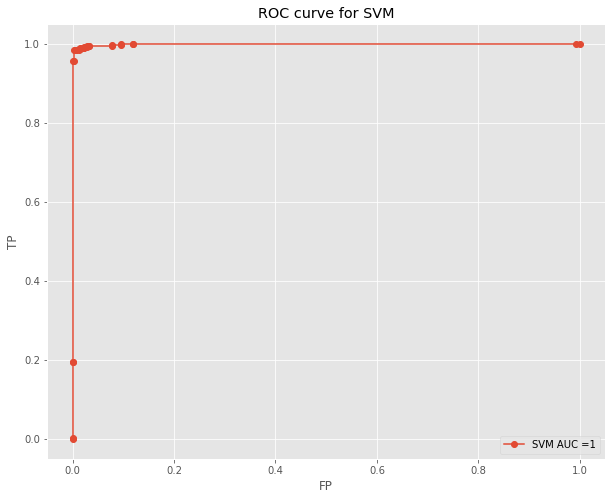

In [180]:
#plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,'o-',label=f"SVM AUC ={round(np.mean(roc_auc))}")
plt.title("ROC curve for SVM")
plt.ylabel('TP')
plt.xlabel('FP')
plt.legend(loc=4)
plt.show()